In [30]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [31]:
imp_dir = "/home/hychimaa/workspace/molpc_imp/result/tmscores/mmalign_imp/*"
molpc_dir = "/home/hychimaa/workspace/molpc_imp/result/tmscores/mmalign_molpc/*"
molpc2_dir = "/home/hychimaa/workspace/molpc_imp/src/analysis/mmalign/*"

In [32]:
lst = []

for p in glob.glob(molpc2_dir):
    with open(p) as f:
        lines = f.readlines()
        score = lines[1].split("\t")[2]
        lst.append(f'{os.path.basename(p)[0:4]}, {score}')

In [33]:
with open('mmalign_molpc2.csv', 'w') as f:
    for line in lst:
        f.write(f"{line}\n")

rain cloud plot

In [34]:
imp = pd.read_csv('mmalign_imp.csv', header=None)
molpc = pd.read_csv('mmalign_molpc.csv', header=None)
molpc2 = pd.read_csv('mmalign_molpc2.csv', header=None)

In [35]:
imp_tmscores = imp[1].to_list()
molpc_tmscores = molpc[1].to_list()
molpc2_tmscores = molpc2[1].to_list()

In [36]:
data_x = [molpc_tmscores, molpc2_tmscores]

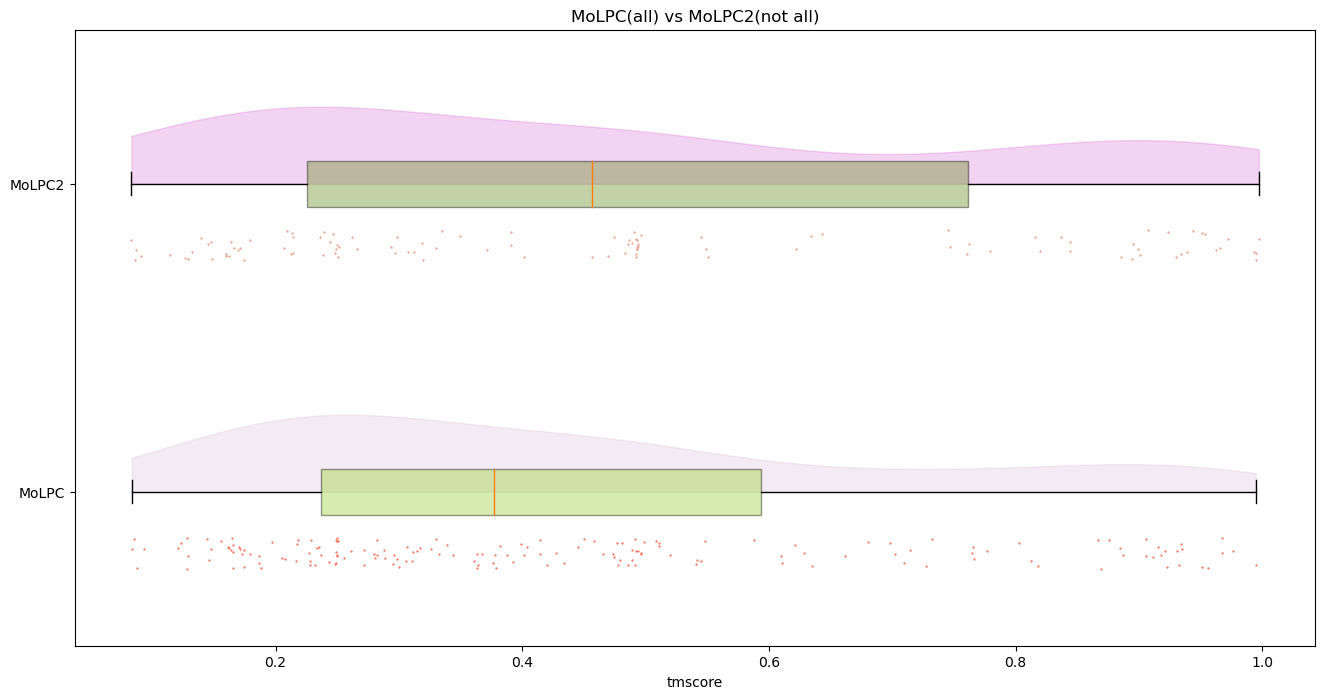

In [39]:
fig, ax = plt.subplots(figsize=(16, 8))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['MoLPC', 'MoLPC2'])  # Set text labels.
plt.xlabel('tmscore')
plt.title("MoLPC(all) vs MoLPC2(not all)")
plt.show()

# To Do list